In [1]:
import pandas as pd 

data=pd.read_csv('/kaggle/input/pizza-price-prediction/pizza_v2.csv')
data.head()
#top five rows display

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [2]:
data.tail() 
#last five row display

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes
128,E,"Rp78,000",12 inch,meat,BBQ_meat_fiesta,medium,no,no,yes


In [3]:
#find shape of our dataset 
data.shape
print("Number Of Rows",data.shape[0])
print("Number Of Columns",data.shape[1])

Number Of Rows 129
Number Of Columns 9


In [4]:
#get informantion about our dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [5]:
#check null values 
data.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [6]:
#get statstics about dataset 
data.describe()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,129,129,129,129,129,129,129,129,129
unique,5,43,12,12,20,6,2,2,2
top,C,"Rp72,000",12 inch,chicken,classic,medium,yes,yes,yes
freq,30,11,49,29,30,41,76,86,72


In [7]:
#data preprocessing 
data.head()
data.rename({'price_rupiah':'price'},axis=1,inplace=True)
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [8]:
data['price']=data['price'].str.replace("Rp","")
data['price']=data['price'].str.replace(",","").astype('int32')
data.head()


,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price            129 non-null    int32 
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: int32(1), object(8)
memory usage: 8.7+ KB


In [10]:
def convert(value):
    return value *0.0054
data['price']=data['price'].apply(convert)
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [11]:
data['diameter']=data['diameter'].str.replace("inch","")
data['diameter']=data['diameter'].str.replace(" ","").astype('float32')
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [12]:
#univariate analysis
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [13]:
data['company'].value_counts()

company
C    30
E    30
A    25
B    24
D    20
Name: count, dtype: int64

In [14]:
import matplotlib.pyplot as plt 


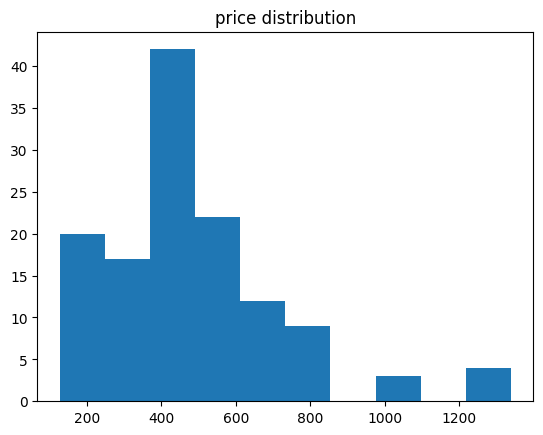

In [15]:
plt.hist(x="price",data=data)
plt.title("price distribution")
plt.show()

In [16]:
data['diameter'].value_counts()

diameter
12.0    49
14.0    24
8.5     22
17.0    10
18.5     6
16.0     5
8.0      4
16.5     4
22.0     3
20.0     1
18.0     1
Name: count, dtype: int64

In [17]:
import seaborn as sns

<Axes: xlabel='diameter', ylabel='count'>

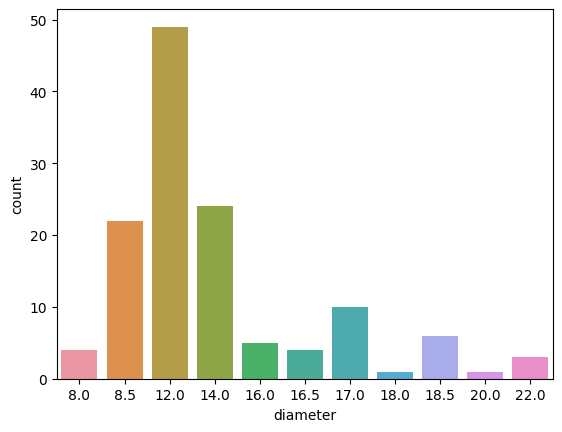

In [18]:
sns.countplot(x=data['diameter'])

In [19]:
data['topping'].value_counts

<bound method IndexOpsMixin.value_counts of 0          chicken
1        papperoni
2        mushrooms
3      smoked_beef
4       mozzarella
          ...     
124           tuna
125           tuna
126           tuna
127           meat
128           meat
Name: topping, Length: 129, dtype: object>

<Axes: xlabel='count', ylabel='topping'>

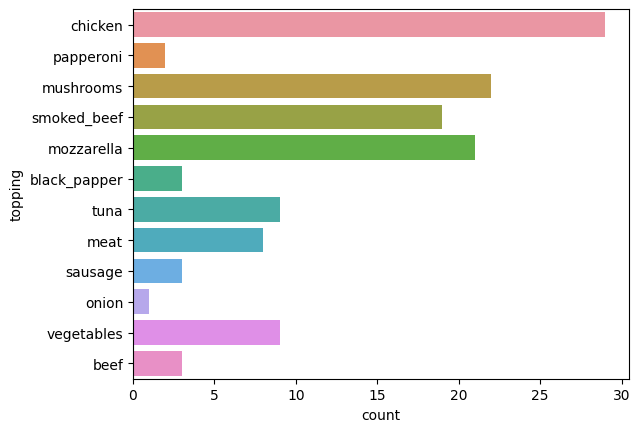

In [20]:
sns.countplot(y=data['topping'])

In [21]:
data['variant'].value_counts

<bound method IndexOpsMixin.value_counts of 0      double_signature
1      double_signature
2      double_signature
3      double_signature
4      double_signature
             ...       
124          spicy tuna
125          spicy tuna
126          spicy tuna
127     BBQ_meat_fiesta
128     BBQ_meat_fiesta
Name: variant, Length: 129, dtype: object>

<Axes: xlabel='count', ylabel='variant'>

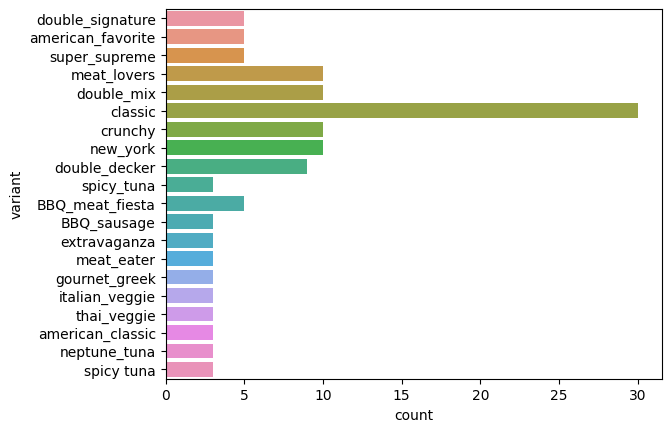

In [22]:
sns.countplot(y=data['variant'])

In [23]:
data['size'].value_counts

<bound method IndexOpsMixin.value_counts of 0        jumbo
1        jumbo
2      reguler
3      reguler
4        jumbo
        ...   
124      small
125     medium
126      large
127      small
128     medium
Name: size, Length: 129, dtype: object>

<Axes: xlabel='size', ylabel='count'>

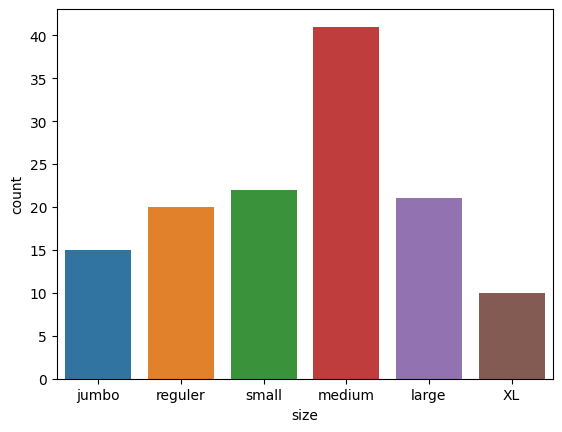

In [24]:
sns.countplot(x=data['size'])

<Axes: xlabel='extra_sauce', ylabel='count'>

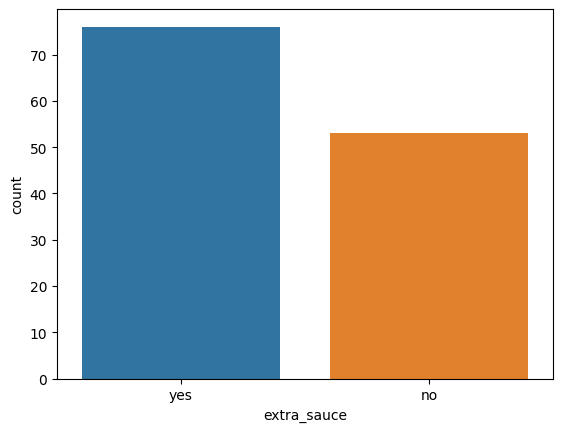

In [25]:
sns.countplot(x=data['extra_sauce'])

<Axes: xlabel='extra_cheese', ylabel='count'>

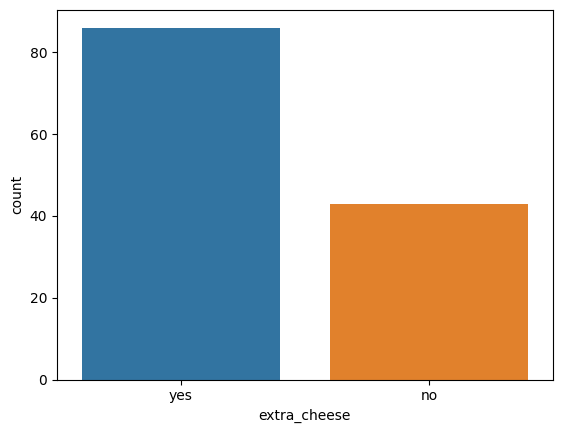

In [26]:
sns.countplot(x=data['extra_cheese'])

<Axes: xlabel='extra_mushrooms', ylabel='count'>

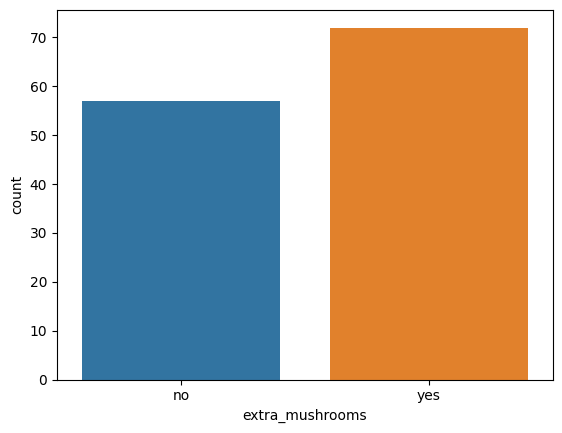

In [27]:
sns.countplot(x=data['extra_mushrooms'])

In [28]:
#bivariate analysis 
#price by company 
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

<Axes: xlabel='company', ylabel='price'>

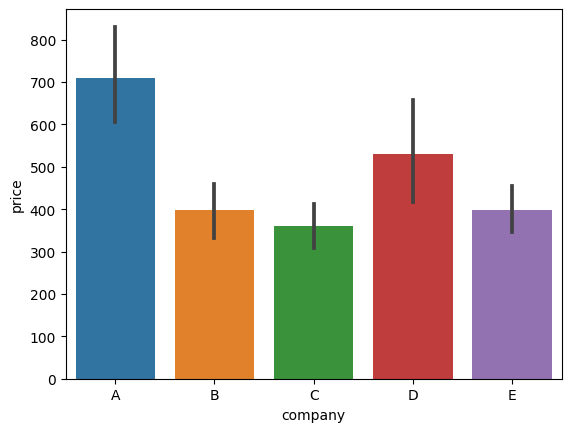

In [29]:
sns.barplot(data, x="company", y="price")

<Axes: xlabel='price', ylabel='topping'>

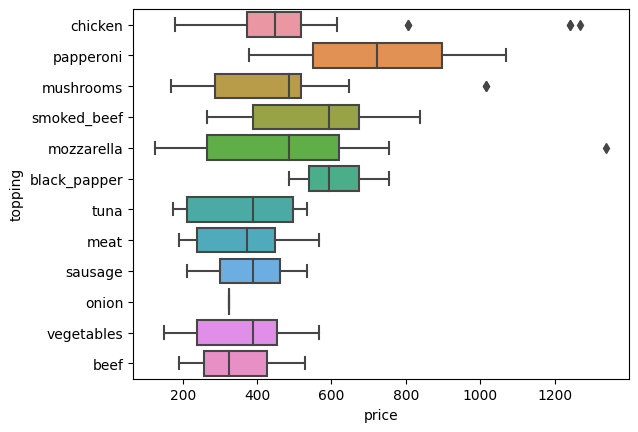

In [30]:
sns.boxplot(data=data, x="price", y="topping")

<Axes: xlabel='price', ylabel='size'>

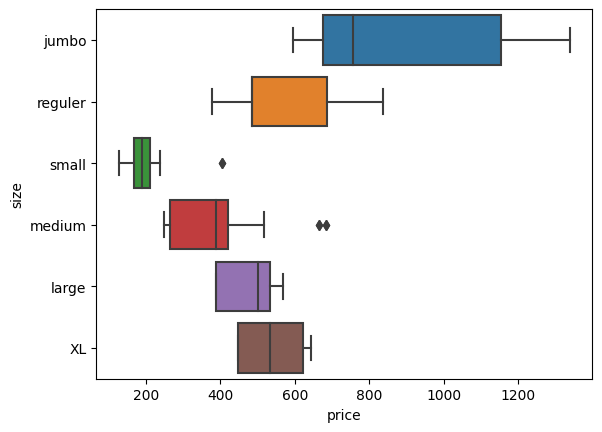

In [31]:
sns.boxplot(data=data, x="price", y="size")

In [32]:
data[data['price'].max()==data['price']]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [33]:
data[data['size']=="jumbo"]['diameter'].head()

0    22.0
1    20.0
4    18.0
5    18.5
6    16.0
Name: diameter, dtype: float32

In [34]:
data[data['size']=="XL"]['diameter'].head()

29    17.0
35    17.0
41    17.0
47    17.0
93    17.0
Name: diameter, dtype: float32

In [35]:
#remove outliers
data[(data['size']=='jumbo')& (data['diameter']<=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
6,A,594.0,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes
11,A,594.0,16.0,black_papper,super_supreme,jumbo,yes,yes,no
16,A,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,yes
80,D,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,no


In [36]:
data=data.drop(data.index[[6,11,16,80]])

In [37]:
data[(data['size']=='jumbo')& (data['diameter']<=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms


In [38]:
#lable encoding 
cat_cols=data.select_dtypes(include=['object']).columns

In [39]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
#covert a catgorical to numerical value 
en=LabelEncoder()
for i in cat_cols:
    data[i]=en.fit_transform(data[i])
data.head()
    

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,1269.0,22.0,2,8,1,1,1,0
1,0,1069.2,20.0,7,8,1,1,1,0
2,0,648.0,16.0,5,8,4,1,1,1
3,0,837.0,14.0,9,8,4,1,0,1
4,0,1339.2,18.0,4,8,1,1,0,1


In [42]:
#independ data store x 
#depended data store y 
#feature matrix in x and y 
x=data.drop('price',axis=1)
y=data['price']

In [43]:
#split dataset into training set & test set
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
...     x, y, test_size=0.33, random_state=42)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(83, 8)
(42, 8)
(83,)
(42,)


In [45]:
#import models 
# price variable is response variable or target variable 
from sklearn.linear_model import LinearRegression 




In [46]:
#model trainig 
#linearregressor 
lr=LinearRegression()
lr.fit(X_train,y_train)



LinearRegression()

In [47]:
#prediction on texgt data 
y_pred1=lr.predict(X_test)


In [48]:
#evaluating the algorithm
from sklearn import metrics

In [49]:
score1=metrics.r2_score(y_test,y_pred1)


In [50]:
print(score1)

0.717615128557545


In [51]:
final_data=pd.DataFrame({'Models':['LR'],'R2_SCORE':[score1]})

In [52]:
final_data

,Models,R2_SCORE
0,LR,0.717615


In [53]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='R2_SCORE'>

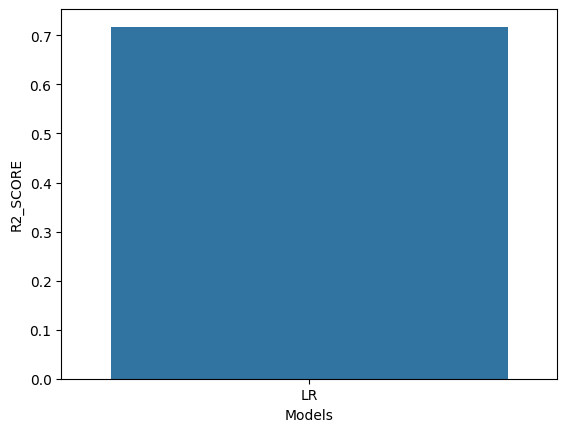

In [54]:
sns.barplot(final_data,x='Models',y='R2_SCORE')

In [55]:
#save the model 
X=data.drop('price',axis=1)
y=data['price']

In [56]:
lrp=LinearRegression()


In [57]:
lrp.fit(X,y)

LinearRegression()

In [58]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,1269.0,22.0,2,8,1,1,1,0
1,0,1069.2,20.0,7,8,1,1,1,0
2,0,648.0,16.0,5,8,4,1,1,1
3,0,837.0,14.0,9,8,4,1,0,1
4,0,1339.2,18.0,4,8,1,1,0,1


In [59]:
import pandas as pd 
df = pd.DataFrame({'company':0,'diameter':14.0,'topping':9,'variant':8,'size':4,'extra_sauce':1,'extra_cheese':0,'extra_mushrooms':0},index=[3])

In [60]:
df

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
3,0,14.0,9,8,4,1,0,0


In [61]:
result=lr.predict(df)
result

array([658.16684816])